# COVID-19 Dataset

In [66]:
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
#data = pd.read_csv('https://raw.githubusercontent.com/open-covid-19/data/master/output/world.csv')
#data.to_csv('./data/covid19world.csv')
#data = pd.read_csv('./data/COVID19_2020_open_line_list_all.csv')
#csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [40]:
data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,48,50,50,50,53,59,70,75,82,114
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,420,461,502,511,581,639,639,701,773,839
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,130,138,150,150,160,178,178,200,212,226
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,83,93,99,117,129,149,149,197,238,428


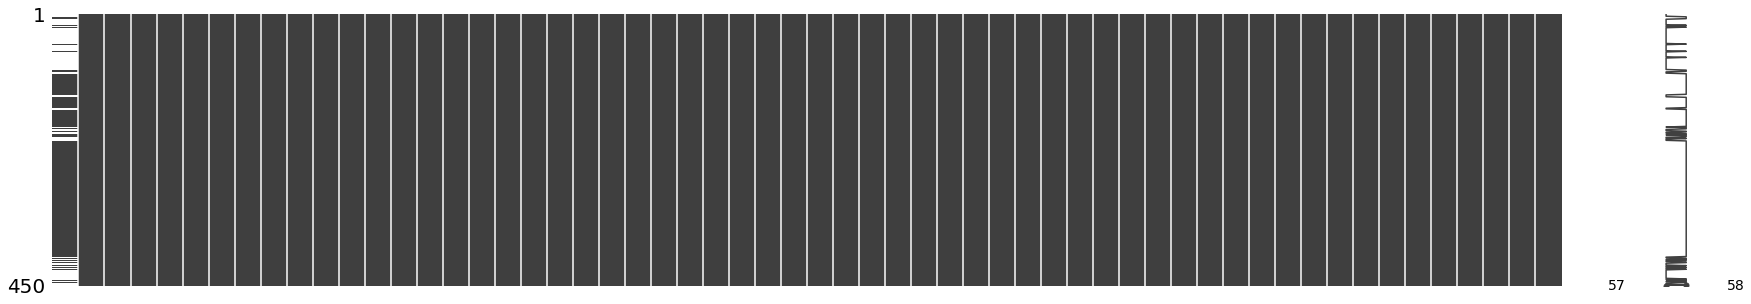

In [41]:
# How many missing values are there in our dataset?
missingno.matrix(data, figsize = (30,5))

It looks like there's not much missing data - except if you look closely, that's not entirely true. This dataset is a little bit of a disaster, as the people at Johns Hopkins keep changing things at random! According to [some people on Reddit](https://www.reddit.com/r/datasets/comments/exnzrd/coronavirus_datasets/), the data from Germany disappeared one day, some of the countries/provinces have changed names, and as of a few days ago, all of the data for the US prior to 3/10 completely disappeared - showing a crazy spike from 0 to hundreds of cases seemingly instantly. How fun. Let's see what we can do with what we have, and if we can fill in any blanks. Maybe the dataset will fix itself soon!

In [44]:
us_data = data[data['Country/Region']=='US']

In [230]:
us_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
99,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,0,0,267,366,442,568,572,643
100,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,0,0,173,220,328,421,525,732
101,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,0,0,144,177,221,282,340,426
102,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,0,0,92,95,108,123,138,164
103,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,45,45,46,46,46,46,46,46


In [152]:
italy_data = data[data['Country/Region']=='Italy']

In [153]:
italy_data

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20
16,NaN,Italy,43.0,12.0,0,0,0,0,0,0,...,4636,5883,7375,9172,10149,12462,12462,17660,21157,24747


Not entirely sure why the each new day is entered as a column rather than a row - certainly the opposite would have been more useful for further analysis, but we can transpose the data ourselves to plot.

In [155]:
def transpose_country_data(df, country):
    country_data = df[df['Country/Region']==country]
    country_T = country_data.drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).transpose()
    country_T = country_T.rename(columns={country_T.columns[0]: country})
    return country_T

In [89]:
def transpose_data(df, state):
    state_data = df[df['Province/State']==state]
    state_T = state_data.drop(columns=['Province/State', 'Country/Region','Lat', 'Long']).transpose()
    state_T = state_T.rename(columns={state_T.columns[0]: state})
    return state_T

In [156]:
Ill_data = transpose_data(data, 'Illinois')
Penn_data = transpose_data(data, 'Pennsylvania')
Maryland_data = transpose_data(data, 'Maryland')
NC_data = transpose_data(data, 'North Carolina')
Texas_data = transpose_data(data, 'Texas')
Iowa_data = transpose_data(data, 'Iowa')
Colorado_data = transpose_data(data, 'Colorado')
Florida_data = transpose_data(data, 'Florida')
Oregon_data = transpose_data(data, 'Oregon')
NJ_data = transpose_data(data, 'New Jersey')
SC_data = transpose_data(data, 'South Carolina')
TN_data = transpose_data(data, 'Tennessee')
Virginia_data = transpose_data(data, 'Virginia')
AZ_data = transpose_data(data, 'Arizona')
Indiana_data = transpose_data(data, 'Indiana')
Kentucky_data = transpose_data(data, 'Kentucky')

WA_data = transpose_data(data, 'Washington')

Italy_data_T = transpose_country_data(italy_data, 'Italy')

For the US, most of the states other than WA and CA had few cases prior to 3/10 when the data disappeared, so there's no problem keeping these rows as is! For WA and CA, however, the sudden jumps make no sense. I haven't yet been able to find a reliable source to impute this missing data for the full state, but King County (where Seattle is located) has been releasing the total cases at the end of each day on their government health site:

In [225]:
# inputted manually from https://www.kingcounty.gov/depts/health/news/2020/March.aspx
WA_King_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
                0, 0, 0, 10, 14, 21, 31, 51, 58, 71, 83, 116, 190, 234, 270, 328, 388, 420, 488]

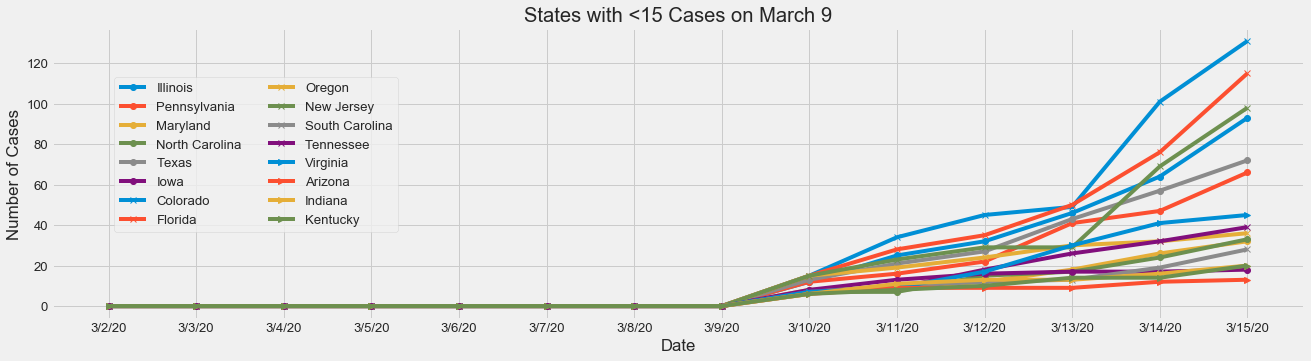

In [228]:
fig = plt.figure(figsize=(20,5))
sns.set(font_scale=1.2)

plt.style.use('fivethirtyeight')
plt.plot(Ill_data[40:],marker='o', label = 'Illinois')
plt.plot(Penn_data[40:],marker='o', label='Pennsylvania')
plt.plot(Maryland_data[40:],marker='o', label='Maryland')
plt.plot(NC_data[40:],marker='o', label='North Carolina')
plt.plot(Texas_data[40:],marker='o', label='Texas')
plt.plot(Iowa_data[40:],marker='o', label='Iowa')
plt.plot(Colorado_data[40:],marker='x', label='Colorado')
plt.plot(Florida_data[40:],marker='x', label='Florida')
plt.plot(Oregon_data[40:],marker='x', label='Oregon')
plt.plot(NJ_data[40:],marker='x', label='New Jersey')
plt.plot(SC_data[40:],marker='x', label='South Carolina')
plt.plot(TN_data[40:],marker='x', label='Tennessee')
plt.plot(Virginia_data[40:],marker='>', label='Virginia')
plt.plot(AZ_data[40:],marker='>', label='Arizona')
plt.plot(Indiana_data[40:],marker='>', label='Indiana')
plt.plot(Kentucky_data[40:],marker='>', label='Kentucky')

plt.legend(loc=(0.05,0.3), ncol=2)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('States with <15 Cases on March 9');

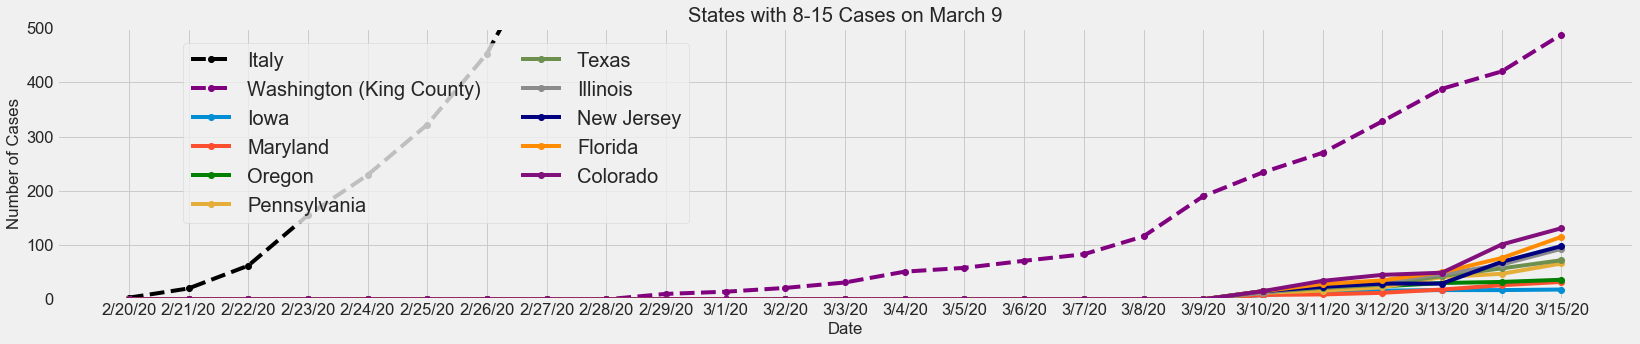

In [226]:
fig = plt.figure(figsize=(23,5))
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

plt.plot(Italy_data_T[29:],marker='o', label='Italy', color='black', ls='--')
plt.plot(WA_King_data[29:],marker='o', label='Washington (King County)', color='purple', ls='--')
plt.plot(Iowa_data[29:],marker='o', label='Iowa')
plt.plot(Maryland_data[29:],marker='o', label='Maryland')
plt.plot(Oregon_data[29:],marker='o', label='Oregon', color='green')
plt.plot(Penn_data[29:],marker='o', label='Pennsylvania')
plt.plot(Texas_data[29:],marker='o', label='Texas')
plt.plot(Ill_data[29:],marker='o', label = 'Illinois')
plt.plot(NJ_data[29:],marker='o', label='New Jersey', color='navy')
plt.plot(Florida_data[29:],marker='o', label='Florida', color='darkorange')
plt.plot(Colorado_data[29:],marker='o', label='Colorado')

plt.ylim(0,500)
plt.legend(loc=(0.08,0.28), ncol=2, fontsize=20)
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('States with 8-15 Cases on March 9')
plt.tight_layout()
plt.savefig('covid19_us_1.png')

## Survival Analysis